## Parsing BayEnv2 results
**20200304**

In [3]:
!ls bf*

bf_environ.CG_environfile_forBayEnv2_likeX.txt
bf_environ.PC_environfile_noEld_forBayEnv2.txt


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Get meaningful locus names

In [2]:
genepop = open("/mnt/hgfs/E/dD_cragig_mox_20191205/filtering/analyses/primSNPs_CGmox_all.gen", "r")
locus_names = []
foundpop = False
for line in genepop:
    if line.startswith("#") == False:
        if line.strip() in ['Pop', 'pop']:
            foundpop = True
        if foundpop == False:
            locus_names.append(line.strip())     
genepop.close()

print(len(locus_names))
print(locus_names[0:5])
print(locus_names[-5:])

5932
['dDocent_Contig_37_91', 'dDocent_Contig_39_97', 'dDocent_Contig_55_22', 'dDocent_Contig_124_119', 'dDocent_Contig_137_41']
['dDocent_Contig_88541_18', 'dDocent_Contig_89803_74', 'dDocent_Contig_92324_145', 'dDocent_Contig_92804_136', 'dDocent_Contig_94190_62']


## Read in bayenv2 results

In [4]:
bayenv_results_path = "bf_environ.CG_environfile_forBayEnv2_likeX.txt"

In [6]:
col_names = ["LocusName",
             "BO2_salinitymean_ss", # mean salinity at surface
              "BO2_ppmean_ss", # mean primary production at surface
              "BO2_nitratemean_ss", # mean nitrate at surface
              "BO2_phosphatemean_ss", # mean nitrate at surface
              "BO2_dissoxmean_ss", # mean dissox at surface

              "BO2_salinitymean_bdmean", # mean salinity at mean bottom
              "BO2_ppmean_bdmean", # primary production at mean bottom
              "BO2_nitratemean_bdmean", # mean nitrate at mean depth
              "BO2_phosphatemean_bdmean", # mean phosphate at mean depth
              "BO2_dissoxmean_bdmean", # mean dissox at max depth

              "BO_bathymean", # bathymetry
              "BO_ph", # surface pH 
              "BO_calcite", # mean calcite

              # CURRENT VELOCITY AT SURFACE AND MAX DEPTH
              "BO2_curvelmax_ss", # surface max current velocity
              "BO2_curvelmin_ss", # surface min current velocity
              "BO2_curvelmean_ss", # surface mean current velocity
              "BO2_curvelrange_ss", # surface range current velocity
              "BO2_curvelmax_bdmean", # mean bottom max current velocity
              "BO2_curvelmin_bdmean", # mean bottom min current velocity
              "BO2_curvelrange_bdmean", # mean bottom range current velocity
              "BO2_curvelmean_bdmean", # mean bottom mean current velocity

              # TEMP AT SURFACE AND MAX DEPTH
              "BO2_tempmax_ss", # max SST
              "BO2_tempmean_ss", # mean SST
              "BO2_tempmin_ss", # min SST
              "BO2_temprange_ss", # range SST
              "BO2_tempmax_bdmean", # maximum temp at mean bottom
              "BO2_tempmean_bdmean", # mean temp at mean bottom
              "BO2_tempmin_bdmean", # min temp at mean bottom
              "BO2_temprange_bdmean" # range temp at mean bottom
                                                  ]

bayenv_df = pd.read_csv(bayenv_results_path, 
                        delimiter = '\t', 
                        names = col_names,
                        usecols=range(30))
bayenv_df['LocusName'] = locus_names

In [7]:
bayenv_df

,LocusName,BO2_salinitymean_ss,BO2_ppmean_ss,BO2_nitratemean_ss,BO2_phosphatemean_ss,BO2_dissoxmean_ss,BO2_salinitymean_bdmean,BO2_ppmean_bdmean,BO2_nitratemean_bdmean,BO2_phosphatemean_bdmean,...,BO2_curvelrange_bdmean,BO2_curvelmean_bdmean,BO2_tempmax_ss,BO2_tempmean_ss,BO2_tempmin_ss,BO2_temprange_ss,BO2_tempmax_bdmean,BO2_tempmean_bdmean,BO2_tempmin_bdmean,BO2_temprange_bdmean
0,dDocent_Contig_37_91,0.09214,0.25446,0.18588,0.12526,0.10972,0.12004,0.096852,0.12480,0.11938,...,0.11536,0.10163,0.20898,0.148690,0.13298,0.088881,0.12528,0.095929,0.10006,0.11212
1,dDocent_Contig_39_97,0.17365,0.14730,0.14281,1.14890,0.56216,0.17706,0.160960,0.16747,0.18303,...,0.16406,0.17339,0.14337,0.153840,0.16099,0.170900,0.17388,0.155650,0.17444,0.18992
2,dDocent_Contig_55_22,0.14255,0.15626,0.14099,0.26070,0.13643,0.12153,0.124760,0.11975,0.12095,...,0.15146,0.18056,0.19569,0.134930,0.13068,0.151960,0.12231,0.120200,0.19845,0.13125
3,dDocent_Contig_124_119,0.11842,0.18351,0.14056,0.85068,0.12667,0.12255,0.134290,0.12136,0.12530,...,0.53940,0.24711,0.11831,0.291160,0.40020,0.176350,0.12789,0.133970,0.18958,0.14491
4,dDocent_Contig_137_41,0.21393,0.17768,0.20531,0.10998,0.37503,1.37600,0.522250,1.32590,1.42210,...,0.27859,0.29851,0.20010,0.261090,0.25773,0.236700,2.23270,0.372520,0.33506,1.12810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5927,dDocent_Contig_88541_18,0.12897,0.30388,0.14694,0.14884,0.12599,0.13831,0.123680,0.13488,0.13981,...,0.13635,0.13851,0.19243,0.158430,0.14403,0.158780,0.14003,0.125330,0.14019,0.14817
5928,dDocent_Contig_89803_74,0.11764,0.37504,0.16300,0.13189,0.14119,0.38167,0.731080,0.32410,0.29060,...,0.19305,0.16332,0.13459,0.096747,0.10811,0.168390,0.16609,0.131310,0.13401,0.12168
5929,dDocent_Contig_92324_145,0.12272,0.15405,0.14434,0.11527,0.16171,0.20924,0.140780,0.19703,0.21571,...,0.13788,0.13579,0.15245,0.181230,0.16070,0.150940,0.23232,0.131110,0.14709,0.26374
5930,dDocent_Contig_92804_136,0.14778,0.14705,0.14195,0.12194,0.12440,0.12015,0.147450,0.12613,0.11724,...,0.13870,0.14291,0.15915,0.184790,0.16733,0.135330,0.12090,0.160120,0.13473,0.12582


## Write "raw" results to file

In [11]:
pd.DataFrame.to_csv(bayenv_df, 
                     path_or_buf="CG_bayenv_results_29vars.txt", 
                     sep=' ')

## Make tidy dataframe of significant results qualitative support categories

Make new dataframe of significant results

For each significant result (BF > 3.2):

SNP Name, Env Var, BF, QualSupport

In [12]:
def get_support(x):
    if x >= 3.2 and x < 10:
        return("Substantial")
    elif x >= 10 and x < 100:
        return("Strong")
    elif x > 100:
        return("Decisive")
    else:
        print("Something went wrong in determining qualititative support")

In [13]:
results_for_df = []
for col_name in col_names[1:]:
    for locus_index, locus_name in enumerate(locus_names):
        bf = bayenv_df[col_name][locus_index]
        if bf > 3.2: # worth recording
            row_to_add = [locus_name, col_name, bf, get_support(bf)]
            results_for_df.append(row_to_add)

adaploci_df = pd.DataFrame(results_for_df, columns=["Locus","EnvVar","BayesFactor","SupporLevel"])
adaploci_df   

,Locus,EnvVar,BayesFactor,SupporLevel
0,dDocent_Contig_289_100,BO2_salinitymean_ss,5.8559,Substantial
1,dDocent_Contig_854_100,BO2_salinitymean_ss,4.1430,Substantial
2,dDocent_Contig_1729_61,BO2_salinitymean_ss,4.9818,Substantial
3,dDocent_Contig_2464_19,BO2_salinitymean_ss,19.7970,Strong
4,dDocent_Contig_3228_111,BO2_salinitymean_ss,8.8552,Substantial
...,...,...,...,...
653,dDocent_Contig_21697_111,BO2_temprange_bdmean,4.3663,Substantial
654,dDocent_Contig_27554_15,BO2_temprange_bdmean,10.4860,Strong
655,dDocent_Contig_32230_8,BO2_temprange_bdmean,5.4219,Substantial
656,dDocent_Contig_65396_27,BO2_temprange_bdmean,3.6945,Substantial


In [14]:
pd.DataFrame.to_csv(adaploci_df, 
                     path_or_buf="CG_BE2_29vars_putadapt.txt", 
                     sep='\t')

In [15]:
len(set(adaploci_df['Locus']))

292

## Is there a potentially biologically meaningful cutoff for support

Sometimes in lab discussions, we look for breaks in the data with the assumption that they may be biologically meaningful. Worth investigating!

In [16]:
adaploci_df['LogBF'] = np.log10(adaploci_df['BayesFactor'])

In [17]:
adaploci_df.iloc[0:5,]

,Locus,EnvVar,BayesFactor,SupporLevel,LogBF
0,dDocent_Contig_289_100,BO2_salinitymean_ss,5.8559,Substantial,0.767594
1,dDocent_Contig_854_100,BO2_salinitymean_ss,4.1430,Substantial,0.617315
2,dDocent_Contig_1729_61,BO2_salinitymean_ss,4.9818,Substantial,0.697386
3,dDocent_Contig_2464_19,BO2_salinitymean_ss,19.7970,Strong,1.296599
4,dDocent_Contig_3228_111,BO2_salinitymean_ss,8.8552,Substantial,0.947198


In [18]:
minbf = min(adaploci_df['LogBF'])
maxbf = max(adaploci_df['LogBF'])

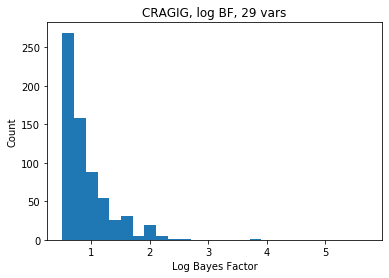

In [19]:
plt.hist(adaploci_df['LogBF'], bins=np.arange(minbf, maxbf+2, 0.2))
plt.xlabel('Log Bayes Factor')
plt.ylabel('Count')
plt.title("CRAGIG, log BF, 29 vars")
plt.show()

Nope, seems like left leaning ditribution with small tail

In [20]:
decisive_df = adaploci_df[adaploci_df['SupporLevel']=='Decisive']

In [21]:
decisive_df

,Locus,EnvVar,BayesFactor,SupporLevel,LogBF
38,dDocent_Contig_2608_55,BO2_nitratemean_ss,6973.60,Decisive,3.843457
60,dDocent_Contig_916_116,BO2_phosphatemean_ss,354.23,Decisive,2.549285
72,dDocent_Contig_8472_135,BO2_phosphatemean_ss,114.25,Decisive,2.057856
115,dDocent_Contig_27554_15,BO2_salinitymean_bdmean,107.95,Decisive,2.033223
166,dDocent_Contig_27554_15,BO2_nitratemean_bdmean,126.73,Decisive,2.102879
207,dDocent_Contig_2608_55,BO_bathymean,155.60,Decisive,2.192010
241,dDocent_Contig_40851_77,BO_ph,107.04,Decisive,2.029546
292,dDocent_Contig_2464_19,BO2_curvelmin_ss,188.04,Decisive,2.274250
410,dDocent_Contig_3993_17,BO2_curvelrange_bdmean,120.91,Decisive,2.082462
439,dDocent_Contig_3993_17,BO2_curvelmean_bdmean,100.34,Decisive,2.001474


In [22]:
pd.DataFrame.to_csv(decisive_df, 
                     path_or_buf="CG_be2_decisiveSNPs.txt", 
                     sep='\t')

In [23]:
atleaststrong_df = adaploci_df[adaploci_df['BayesFactor']>=10]

In [24]:
atleaststrong_df

,Locus,EnvVar,BayesFactor,SupporLevel,LogBF
3,dDocent_Contig_2464_19,BO2_salinitymean_ss,19.797,Strong,1.296599
7,dDocent_Contig_7856_82,BO2_salinitymean_ss,11.322,Strong,1.053923
16,dDocent_Contig_40851_77,BO2_salinitymean_ss,34.001,Strong,1.531492
17,dDocent_Contig_2608_55,BO2_ppmean_ss,41.300,Strong,1.615950
19,dDocent_Contig_3946_144,BO2_ppmean_ss,11.446,Strong,1.058654
...,...,...,...,...,...
643,dDocent_Contig_9739_107,BO2_temprange_bdmean,12.436,Strong,1.094681
644,dDocent_Contig_13393_121,BO2_temprange_bdmean,111.230,Decisive,2.046222
647,dDocent_Contig_14915_45,BO2_temprange_bdmean,20.579,Strong,1.313424
654,dDocent_Contig_27554_15,BO2_temprange_bdmean,10.486,Strong,1.020610


In [25]:
len(list(set(atleaststrong_df['Locus'])))

90